 # Main features that impact job satisfaction

Project part of the University of Tartu's course **"Introduction to Data Science (Sissejuhatus andmeteadusesse) - LTAT.02.002"**

Author: Janar Kallson

<br>

## Step 1 - Preparation (Reading in the dataset etc)

The goal is to find out how certain skills and traits are affecting the job satisfaction so that developers who are currently looking for a job can see if the skills they possess and the traits they have are going to make them satisfied with their work in their future or not. In this research I am going to only use the answers of the persons who are working either full time, part time or are self-employed at the time of taking this survey. The reason I decided do do that is because the answers of the people who have retired already might not be so relevant today.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data =  pd.read_csv("survey_results_public.csv")

worktime = ["Employed full-time", "Independent contractor, freelancer, or self-employed", "Employed part-time"]
branch = ["I am a developer by profession","I am not primarily a developer, but I write code sometimes as part of my work"]

#Selecting only the answers of the people who are working at the moment
data = data[data.Employment.isin(worktime)]

#Selecting only the answers of the people who are developers by profession or people who are not primarily a developer have to write code sometimes as part of their work
data = data[data.MainBranch.isin(branch)]

# Displaying an example of data
data

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
2,3,"I am not primarily a developer, but I write co...",Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Thailand,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Web development or web design,...,Just as welcome now as I felt last year,Tech meetups or events in your area;Courses on...,28.0,Man,No,Straight / Heterosexual,NaN,Yes,Appropriate in length,Neither easy nor difficult
3,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,22.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
4,5,I am a developer by profession,Yes,Once a month or more often,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,Ukraine,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech meetups or events in your area;Courses on...,30.0,Man,No,Straight / Heterosexual,White or of European descent;Multiracial,No,Appropriate in length,Easy
5,6,"I am not primarily a developer, but I write co...",Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Canada,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Mathematics or statistics,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,28.0,Man,No,Straight / Heterosexual,East Asian,No,Too long,Neither easy nor difficult
6,7,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,"Independent contractor, freelancer, or self-em...",Ukraine,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Another engineering discipline (ex. civil, ele...",...,A lot more welcome now than last year,NaN,42.0,Man,No,Straight / Heterosexual,White or of European descent,Yes,Appropriate in length,Neither easy nor difficult
8,9,I am a developer by profession,Yes,Once a month or more often,The quality of OSS and closed source software ...,Employed full-time,New Zealand,No,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,NaN,23.0,Man,No,Bisexual,White or of European descent,No,Appropriate in length,Neither easy nor difficult
9,10,I am a developer by profession,Yes,Once a month or more often,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,India,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",NaN,...,Somewhat less welcome now than last year,Tech articles written by other developers;Tech...,NaN,NaN,NaN,NaN,NaN,Yes,Too long,Difficult
12,13,I am a developer by profession,Yes,Less than once a month but more than once per ...,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,United States,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",...,Somewhat more welcome now than last year,Tech articles written by other developers;Cour...,28.0,Man,No,Straight / Heterosexual,White or of European descent,Yes,Appropriate in length,Easy
13,14,I am a developer by profession,Yes,Less than once per year,The quality of OSS and closed source software ...,Employed full-time,Germany,No,"Other doctoral degree (Ph.D, Ed.D., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Cour...,31.0,Man,No,Straight / Heterosexual,White or of European descent,No,Too short,Easy
15,16,I am a developer by profession,Yes,Never,The quality of OSS and closed source software .

<br>

## Step 2 - Choosing the features on which basis to train the model

From this dataset I am going to use most of the features that are presented but I am going to eliminate the features that can not be changed by a person or are not important for this algorithm (for example age, info about survey length, info about the difficulty of the survey etc.). I am going to create a new dafaframe called satisfaction because I want to keep a dataframe which contains all of the features.

### Satisfaction dataframe

**The "satisfaction" dataframe consists of the following columns:**  <br>  <br>
1) Respondent - Respondent's id from the original data <br>
2) MainBranch - What is respondent mostly doing? <br>
3) Hobbyst - Does the respondent code as a hobby? <br>
4) OpenSourcer - Does respondent contribute to open source? <br>
5) Employment - Respondent's employment status <br>
6) Country - Developer's country <br>
7) EdLevel - Developer's education level <br>
8) OrgSize - How many people are approximately working in the company or organization that the respondent works for <br>
9) DevType - Developer's job type <br>
10) YearsCode - How many years has the respondent coded <br>
11) YearsCodePro - How many years has the respondent coded professionally <br>
12) JobSat - How satisfied is the respondent with his/her job <br>
13) MgrWant - Does the respondent want to become a manager in the future? <br>
14) LastHireDate - When was the last time that the respondent took a job with a new employer <br>
15) JobFactors - What are the most important factors to the respondent when considering a job <br>
16) CompTotal - Respondent's current total compensation (salary, bonuses, perks etc) <br>
17) WorkWeekHrs - Developer's weekly work hours <br>
18) WorkPlan - How planned/structured is the respondent's work <br>
19) WorkChallenge - What are the createst challenges to productivity as a developer <br>
20) WorkRemote - How ofter does the respondent work remotely <br>
21) WorkLoc - Respondent's working place preferences <br>
22) ImpSyn - For the spesific work the respondent does, and the years of experience they have, how do they rate their own level of competence <br>
23) LanguageWorkedWith - Programming languages that the respondent has worked with over the past year  <br>
24) DatabaseWorkedWith - Databases that the respondent has worked with over the past year <br>
25) PlatformWorkedWith - Platforms that the respondent has worked with over the past year <br>
26) WebFrameWorkedWith - Webframes that the respondent has worked with over the past year <br>
27) MiscTechWorkedWith - Other frameworks/libraries and tools that the respondent has worked with over the past year <br>
28) DevEnviron - Development environments that the respondent uses regurarly <br>
29) OpSys - Respondent's primary operation system used at work <br>

In [2]:
satisfaction = pd.DataFrame({'Respondent': data["Respondent"], 'MainBranch': data["MainBranch"],
                         'Hobbyist': data["Hobbyist"], 'OpenSourcer': data["OpenSourcer"],'Employment': data["Employment"]
                            ,'Country': data["Country"],'EdLevel': data["EdLevel"]
                            ,'OrgSize': data["OrgSize"],'DevType': data["DevType"]
                            ,'YearsCode': data["YearsCode"],'YearsCodePro': data["YearsCodePro"]
                            ,'JobSat': data["JobSat"],'MgrWant': data["MgrWant"]
                            ,'LastHireDate': data["LastHireDate"],'JobFactors': data["JobFactors"]
                            ,'CompTotal': data["CompTotal"]
                            ,'WorkWeekHrs': data["WorkWeekHrs"],'WorkPlan': data["WorkPlan"]
                            ,'WorkChallenge': data["WorkChallenge"],'WorkRemote': data["WorkRemote"]
                            ,'WorkLoc': data["WorkLoc"],'ImpSyn': data["ImpSyn"]
                            ,'LanguageWorkedWith': data["LanguageWorkedWith"],'DatabaseWorkedWith': data["DatabaseWorkedWith"]
                            ,'PlatformWorkedWith': data["PlatformWorkedWith"],'WebFrameWorkedWith': data["WebFrameWorkedWith"]
                            ,'MiscTechWorkedWith': data["MiscTechWorkedWith"],'DevEnviron': data["DevEnviron"]
                            ,'OpSys': data["OpSys"]})

In [3]:
#Example of satisfaction dataframe
satisfaction.head()

,Respondent,MainBranch,Hobbyist,OpenSourcer,Employment,Country,EdLevel,OrgSize,DevType,YearsCode,...,WorkRemote,WorkLoc,ImpSyn,LanguageWorkedWith,DatabaseWorkedWith,PlatformWorkedWith,WebFrameWorkedWith,MiscTechWorkedWith,DevEnviron,OpSys
2,3,"I am not primarily a developer, but I write co...",Yes,Never,Employed full-time,Thailand,"Bachelor’s degree (BA, BS, B.Eng., etc.)",100 to 499 employees,"Designer;Developer, back-end;Developer, front-...",3,...,Less than once per month / Never,Home,Average,HTML/CSS,PostgreSQL,NaN,NaN,NaN,Vim;Visual Studio Code,Linux-based
3,4,I am a developer by profession,No,Never,Employed full-time,United States,"Bachelor’s degree (BA, BS, B.Eng., etc.)",100 to 499 employees,"Developer, full-stack",3,...,Less than once per month / Never,Home,A little below average,C;C++;C#;Python;SQL,MySQL;SQLite,Linux;Windows,NaN,.NET,Eclipse;Vim;Visual Studio;Visual Studio Code,Windows
4,5,I am a developer by profession,Yes,Once a month or more often,Employed full-time,Ukraine,"Bachelor’s degree (BA, BS, B.Eng., etc.)","10,000 or more employees","Academic researcher;Developer, desktop or ente...",16,...,A few days each month,Office,A little above average,C++;HTML/CSS;Java;JavaScript;Python;SQL;VBA,Couchbase;MongoDB;MySQL;Oracle;PostgreSQL;SQLite,Android;Linux;MacOS;Slack;Windows,Django;Express;Flask;jQuery;React.js;Spring,Cordova;Node.js,IntelliJ;Notepad++;Vim,Linux-based
5,6,"I am not primarily a developer, but I write co...",Yes,Never,Employed full-time,Canada,"Bachelor’s degree (BA, BS, B.Eng., etc.)",NaN,Data or business analyst;Data scientist or mac...,13,...,A few days each month,Home,A little above average,Java;R;SQL,MongoDB;PostgreSQL,Android;Google Cloud Platform;Linux;Windows,NaN,Hadoop,Android Studio;Eclipse;PyCharm;RStudio;Visual ...,Windows
6,7,I am a developer by profession,No,Never,"Independent contractor, freelancer, or self-em...",Ukraine,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Just me - I am a freelancer, sole proprietor, ...","Designer;Developer, front-end",6,...,All or almost all the time (I'm full-time remote),"Other place, such as a coworking space or cafe",Average,HTML/CSS;JavaScript,NaN,MacOS;Windows,React.js,NaN,PHPStorm,Windows


<br>

## Step 3 - Cleaning data

### Converting data to binomical values

Since there are some values that are not numeric in the satisfaction dataset I have to replace them with numeric ones to be able to use this dataset for machine learning. For this I am going to use .replace function and a function that Anders created in his Jupyter Notebook file (Salary).

**I have decided to change job satisfaction values like this:** <br> <br>
Very satisfied - 10 <br>
Slightly satisfied - 7 <br>
Neither satisfied nor dissatisfied - 5 <br>
Slightly dissatisfied - 3 <br>
Very dissatisfied - 0 <br>

The reason I decided to change them like this is that it is easier to understand the values when there is a 10-point scale in my opinion

In [4]:
#Removing results with N/A values
satisfaction = satisfaction.dropna()

#Replacing yes and no with 1 and 0
satisfaction.Hobbyist = satisfaction.Hobbyist.replace("Yes", 1)
satisfaction.Hobbyist = satisfaction.Hobbyist.replace("No", 0)

#Replacing job satisfaction values
satisfaction.JobSat = satisfaction.JobSat.replace("Very dissatisfied", 0)
satisfaction.JobSat = satisfaction.JobSat.replace("Slightly dissatisfied", 3)
satisfaction.JobSat = satisfaction.JobSat.replace("Neither satisfied nor dissatisfied", 5)
satisfaction.JobSat = satisfaction.JobSat.replace("Slightly satisfied", 7)
satisfaction.JobSat = satisfaction.JobSat.replace("Very satisfied", 10)

#Replacing years coded professionally values
satisfaction.YearsCodePro = satisfaction.YearsCodePro.replace("Less than 1 year", 0)
satisfaction.YearsCodePro = satisfaction.YearsCodePro.replace("More than 50 years", 50)


In [5]:

# Function for finding unique options from the survey
def findUniqueEntries(column):
    unique = []
    for i in range(len(column)):
        row = column.iloc[i]
        if type(row) != float:
            row_split = row.split(";")
            for j in range(len(row_split)):
                if row_split[j] not in unique:
                    if row_split[j] != "Other(s):":
                        unique.append(row_split[j])
    return unique

languages = findUniqueEntries(satisfaction["LanguageWorkedWith"])
databases = findUniqueEntries(satisfaction["DatabaseWorkedWith"])
platforms = findUniqueEntries(satisfaction["PlatformWorkedWith"])
webframes = findUniqueEntries(satisfaction["WebFrameWorkedWith"])
miscs = findUniqueEntries(satisfaction["MiscTechWorkedWith"])
edlevels = findUniqueEntries(satisfaction["EdLevel"])
dev = findUniqueEntries(satisfaction["DevType"])
jobfactors = findUniqueEntries(satisfaction["JobFactors"])
workchallenge = findUniqueEntries(satisfaction["WorkChallenge"])
environ = findUniqueEntries(satisfaction["DevEnviron"])

# Adding all the unique features to a list
all_features_list = []
all_features_list.extend(languages)
all_features_list.extend(databases)
all_features_list.extend(platforms)
all_features_list.extend(webframes)
all_features_list.extend(miscs)
all_features_list.extend(dev)
all_features_list.extend(jobfactors)
all_features_list.extend(workchallenge)
all_features_list.extend(environ)
all_features_list.extend(edlevels)


In [6]:
features = pd.DataFrame(columns=all_features_list)

# Adding binomial values for each feature to the features dataframe
for i in range(satisfaction.shape[0]):
    row = satisfaction.iloc[i]
    features_list = []
    if type(row["LanguageWorkedWith"]) != float:
        features_list.extend(row["LanguageWorkedWith"].split(";"))
    if type(row["DatabaseWorkedWith"]) != float:    
        features_list.extend(row["DatabaseWorkedWith"].split(";"))
    if type(row["PlatformWorkedWith"]) != float:
        features_list.extend(row["PlatformWorkedWith"].split(";"))
    if type(row["WebFrameWorkedWith"]) != float:
        features_list.extend(row["WebFrameWorkedWith"].split(";"))
    if type(row["MiscTechWorkedWith"]) != float:
        features_list.extend(row["MiscTechWorkedWith"].split(";"))
    if type(row["EdLevel"]) != float:
        features_list.extend(row["EdLevel"].split(";"))
    if type(row["DevType"]) != float:
        features_list.extend(row["DevType"].split(";"))
    if type(row["JobFactors"]) != float:
        features_list.extend(row["JobFactors"].split(";"))
    if type(row["WorkChallenge"]) != float:
        features_list.extend(row["WorkChallenge"].split(";"))
    if type(row["DevEnviron"]) != float:
        features_list.extend(row["DevEnviron"].split(";"))
        
    new_row = []
    
    # Adding binomial values to a row
    # 0 if developer doesn't have the skill, 1 if developer has the skill
    for j in range(len(all_features_list)):
        if all_features_list[j] not in features_list:
            new_row.append(0)
        else:
            new_row.append(1)
    
    features.loc[i] = (new_row)

    
# Displaying an example of "features" dataframe
features.head()

,Bash/Shell/PowerShell,C#,HTML/CSS,JavaScript,Python,Ruby,Rust,SQL,TypeScript,WebAssembly,...,Zend,Some college/university study without earning a degree,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Master’s degree (MA, MS, M.Eng., MBA, etc.)",Primary/elementary school,"Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)",Associate degree,I never completed any formal education,"Professional degree (JD, MD, etc.)","Other doctoral degree (Ph.D, Ed.D., etc.)"
0,1,1,1,1,1,1,1,1,1,1,...,0,1,0,0,0,0,0,0,0,0
1,1,0,1,1,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
2,0,1,1,1,0,0,0,1,1,0,...,0,1,0,0,0,0,0,0,0,0
3,1,1,1,1,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
4,1,0,1,1,1,1,0,1,1,0,...,0,1,0,0,0,0,0,0,0,0


In [7]:
#Adding respondents column which helps me to merge two dataframes together
respondents = satisfaction["Respondent"]
features["Respondent"] = respondents.reset_index().drop(columns=["index"])

In [8]:
#Now lets remove the unneccesary cells and replace them with the new one
satisfaction = satisfaction.drop(columns=['LanguageWorkedWith', 'DatabaseWorkedWith','PlatformWorkedWith','WebFrameWorkedWith','MiscTechWorkedWith','EdLevel','DevType','JobFactors','WorkChallenge','DevEnviron'])

#Converting satisfaction dataframe values into binomical values
new = pd.get_dummies(satisfaction)

#Merging two dataframes together
final_data = pd.merge(new,features,on="Respondent")

#Example of dataframe which contains binomical values
final_data.head()

,Respondent,Hobbyist,JobSat,CompTotal,WorkWeekHrs,MainBranch_I am a developer by profession,"MainBranch_I am not primarily a developer, but I write code sometimes as part of my work",OpenSourcer_Less than once a month but more than once per year,OpenSourcer_Less than once per year,OpenSourcer_Never,...,Zend,Some college/university study without earning a degree,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Master’s degree (MA, MS, M.Eng., MBA, etc.)",Primary/elementary school,"Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)",Associate degree,I never completed any formal education,"Professional degree (JD, MD, etc.)","Other doctoral degree (Ph.D, Ed.D., etc.)"
0,9,1,7,138000.0,32.0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,17,1,5,90000.0,45.0,1,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
2,19,1,10,9500.0,8.0,1,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
3,20,0,3,3000.0,140.0,0,1,0,0,1,...,0,0,0,1,0,0,0,0,0,0
4,22,1,0,103000.0,40.0,1,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0


In [9]:
#Adding job satisfaction column which helps me to create graphs later
jobsat = satisfaction["JobSat"]
features["JobSat"] = jobsat.reset_index().drop(columns=["index"])


## Step 4 - Creating some diagrams to show different aspects of job satisfaction

### These graphs shows how the respondents rated their job satisfaction (10 being that they are very satisfied with their job and 0 being that they are very dissatisfied)

#### This graph shows how the respondents rated their job satisfaction overall

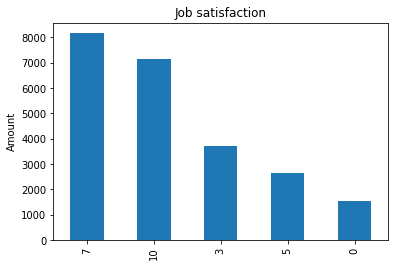

In [10]:
job = final_data["JobSat"].value_counts()

job.plot(kind="bar")

plt.title('Job satisfaction')
plt.ylabel("Amount")
plt.savefig('uusuus.pdf')

Lets find what the average job satisfaction level for all respondents is

In [11]:
final_data["JobSat"].mean()

6.5892173314401274

The average job satisfaction level for all respondents is 6.59

#### These graphs show how the job satisfaction is different between respondents who work part time and who work full time

Text(0, 0.5, 'Amount')

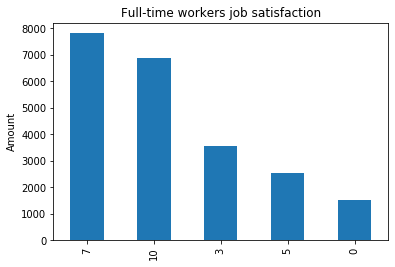

In [12]:
full_time = satisfaction[satisfaction["Employment"] == "Employed full-time"].JobSat.value_counts()

part_time = satisfaction[satisfaction["Employment"] == "Employed part-time"].JobSat.value_counts()

full_time.plot(kind="bar")

plt.title('Full-time workers job satisfaction')
plt.ylabel("Amount")

Lets find what the average job satisfaction level for all respondents is

In [13]:
satisfaction[satisfaction["Employment"] == "Employed full-time"].JobSat.mean()

6.586137281292059

The average job satisfaction level for respondents who work full time is 6.58

Text(0, 0.5, 'Amount')

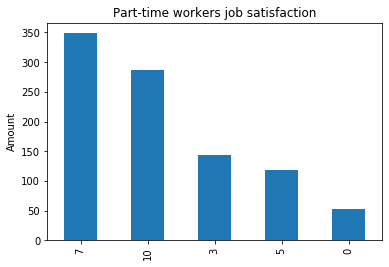

In [14]:
part_time.plot(kind="bar")

plt.title('Part-time workers job satisfaction')
plt.ylabel("Amount")

Lets find what the average job satisfaction level for all respondents is

In [15]:
satisfaction[satisfaction["Employment"] == "Employed part-time"].JobSat.mean()

6.6614090431125135

The average job satisfaction level for respondents who work part-time is 6.66

#### These graphs show how the job satisfaction is affected by work location

In [16]:
#Finding job satisfaction levels and job satisfaction means in different workplaces
office = satisfaction[satisfaction["WorkLoc"] == "Office"].JobSat.value_counts()
office_mean = satisfaction[satisfaction["WorkLoc"] == "Office"].JobSat.mean()

home = satisfaction[satisfaction["WorkLoc"] == "Home"].JobSat.value_counts()
home_mean = satisfaction[satisfaction["WorkLoc"] == "Home"].JobSat.mean()

other = satisfaction[satisfaction["WorkLoc"] == "Other place, such as a coworking space or cafe"].JobSat.value_counts()
other_mean = satisfaction[satisfaction["WorkLoc"] == "Other place, such as a coworking space or cafe"].JobSat.mean()

Text(0, 0.5, 'Amount')

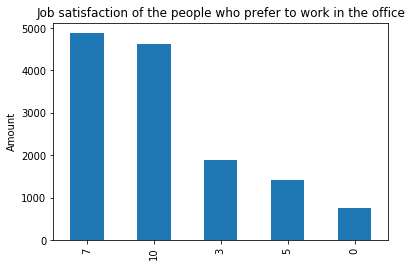

In [17]:
office.plot(kind="bar")

plt.title('Job satisfaction of the people who prefer to work in the office')
plt.ylabel("Amount")

Text(0, 0.5, 'Amount')

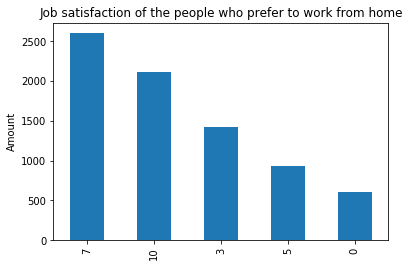

In [18]:
home.plot(kind="bar")

plt.title('Job satisfaction of the people who prefer to work from home')
plt.ylabel("Amount")

Text(0, 0.5, 'Amount')

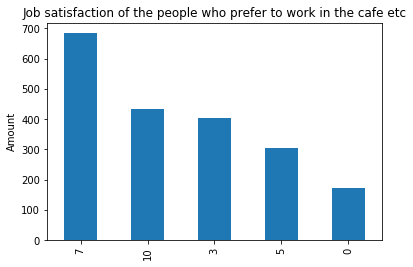

In [19]:
other.plot(kind="bar")

plt.title('Job satisfaction of the people who prefer to work in the cafe etc')
plt.ylabel("Amount")

#### Average job satisfaction levels between workplace preferences

In [20]:
print("Average job satisfaction for people who prefer to work in the office:",office_mean)
print("Average job satisfaction for people who prefer to work from home:",home_mean)
print("Average job satisfaction for people who prefer to work in other places (like caffee):",other_mean)

Average job satisfaction for people who prefer to work in the office: 6.859650416697397
Average job satisfaction for people who prefer to work from home: 6.282869044519656
Average job satisfaction for people who prefer to work in other places (like caffee): 5.9325


#### These graphs show how the job satisfaction is affected by the organization size

In [21]:
twonine = satisfaction[satisfaction["OrgSize"] == "2-9 employees"].JobSat.value_counts()
twonine_mean = satisfaction[satisfaction["OrgSize"] == "2-9 employees"].JobSat.mean()

tennine = satisfaction[satisfaction["OrgSize"] == "10 to 19 employees"].JobSat.value_counts()
tennine_mean = satisfaction[satisfaction["OrgSize"] == "10 to 19 employees"].JobSat.mean()

twentynine = satisfaction[satisfaction["OrgSize"] == "20 to 99 employees"].JobSat.value_counts()
twentynine_mean = satisfaction[satisfaction["OrgSize"] == "20 to 99 employees"].JobSat.mean()

hundrednine = satisfaction[satisfaction["OrgSize"] == "100 to 499 employees"].JobSat.value_counts()
hundrednine_mean = satisfaction[satisfaction["OrgSize"] == "100 to 499 employees"].JobSat.mean()

fivehundrednine = satisfaction[satisfaction["OrgSize"] == "500 to 999 employees"].JobSat.value_counts()
fivehundrednine_mean = satisfaction[satisfaction["OrgSize"] == "500 to 999 employees"].JobSat.mean()

thousand = satisfaction[satisfaction["OrgSize"] == "1,000 to 4,999 employees"].JobSat.value_counts()
thousand_mean = satisfaction[satisfaction["OrgSize"] == "1,000 to 4,999 employees"].JobSat.mean()

fivethousand = satisfaction[satisfaction["OrgSize"] == "5,000 to 9,999 employees"].JobSat.value_counts()
fivethousand_mean = satisfaction[satisfaction["OrgSize"] == "5,000 to 9,999 employees"].JobSat.mean()

tenthousand = satisfaction[satisfaction["OrgSize"] == "10,000 or more employees"].JobSat.value_counts()
tenthousand_mean = satisfaction[satisfaction["OrgSize"] == "10,000 or more employees"].JobSat.mean()

alone = satisfaction[satisfaction["OrgSize"] == "Just me - I am a freelancer, sole proprietor, etc."].JobSat.value_counts()
alone_mean = satisfaction[satisfaction["OrgSize"] == "Just me - I am a freelancer, sole proprietor, etc."].JobSat.mean()

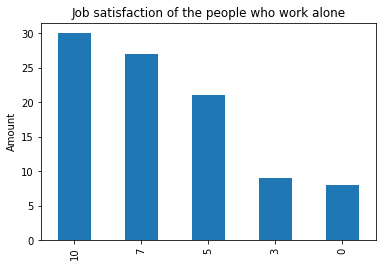

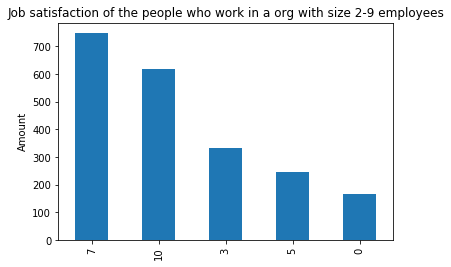

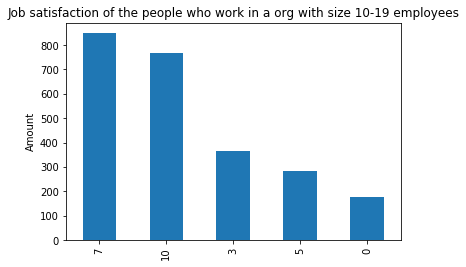

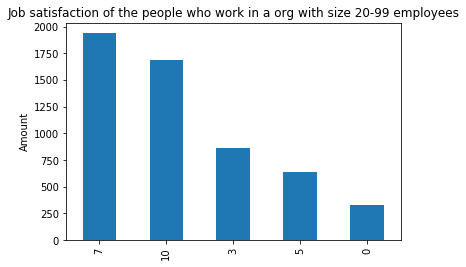

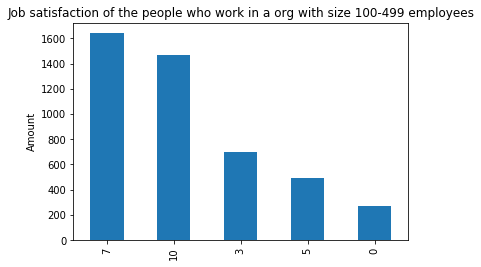

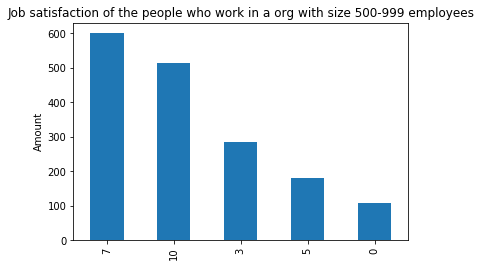

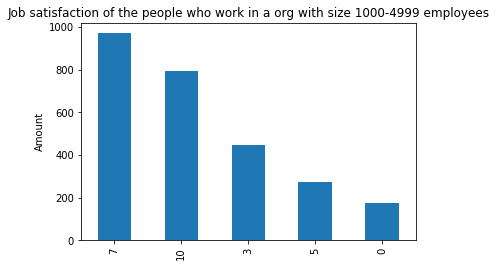

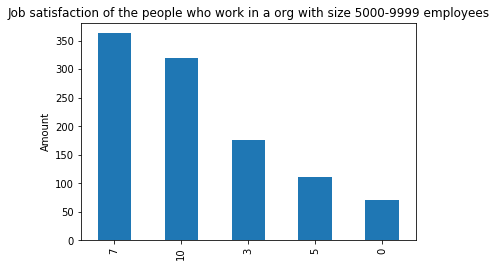

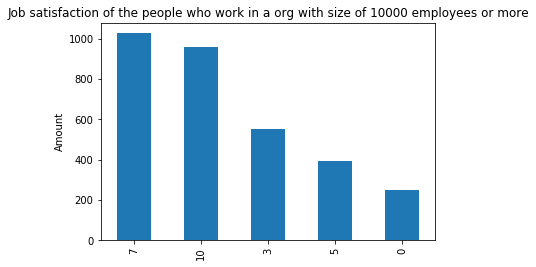

In [22]:
alone.plot(kind="bar")
plt.title('Job satisfaction of the people who work alone')
plt.ylabel("Amount")
plt.show()

twonine.plot(kind="bar")
plt.title('Job satisfaction of the people who work in a org with size 2-9 employees')
plt.ylabel("Amount")
plt.show()

tennine.plot(kind="bar")
plt.title('Job satisfaction of the people who work in a org with size 10-19 employees')
plt.ylabel("Amount")
plt.show()

twentynine.plot(kind="bar")
plt.title('Job satisfaction of the people who work in a org with size 20-99 employees')
plt.ylabel("Amount")
plt.show()

hundrednine.plot(kind="bar")
plt.title('Job satisfaction of the people who work in a org with size 100-499 employees')
plt.ylabel("Amount")
plt.show()

fivehundrednine.plot(kind="bar")
plt.title('Job satisfaction of the people who work in a org with size 500-999 employees')
plt.ylabel("Amount")
plt.show()

thousand.plot(kind="bar")
plt.title('Job satisfaction of the people who work in a org with size 1000-4999 employees')
plt.ylabel("Amount")
plt.show()

fivethousand.plot(kind="bar")
plt.title('Job satisfaction of the people who work in a org with size 5000-9999 employees')
plt.ylabel("Amount")
plt.show()

tenthousand.plot(kind="bar")
plt.title('Job satisfaction of the people who work in a org with size of 10000 employees or more')
plt.ylabel("Amount")
plt.show()

#### Average job satisfaction levels between different workplace sizes

In [23]:
print("Average job satisfaction for people who work alone:",alone_mean)
print("Average job satisfaction for people who work in a organization of size 2-9 employees:",twonine_mean)
print("Average job satisfaction for people who work in a organization of size 10-19 employees:",tennine_mean)
print("Average job satisfaction for people who work in a organization of size 20-99 employees:",twentynine_mean)
print("Average job satisfaction for people who work in a organization of size 100-499 employees:",hundrednine_mean)
print("Average job satisfaction for people who work in a organization of size 500-999 employees:",fivehundrednine_mean)
print("Average job satisfaction for people who work in a organization of size 1000-4999 employees:",thousand_mean)
print("Average job satisfaction for people who work in a organization of size 5000-9999 employees:",fivethousand_mean)
print("Average job satisfaction for people who work in a organization where 10000 or more employees are working",tenthousand_mean)

Average job satisfaction for people who work alone: 6.536842105263158
Average job satisfaction for people who work in a organization of size 2-9 employees: 6.460992907801418
Average job satisfaction for people who work in a organization of size 10-19 employees: 6.598444535407286
Average job satisfaction for people who work in a organization of size 20-99 employees: 6.641862170087976
Average job satisfaction for people who work in a organization of size 100-499 employees: 6.728168089297439
Average job satisfaction for people who work in a organization of size 500-999 employees: 6.584123222748815
Average job satisfaction for people who work in a organization of size 1000-4999 employees: 6.5577719232216785
Average job satisfaction for people who work in a organization of size 5000-9999 employees: 6.556840077071291
Average job satisfaction for people who work in a organization where 10000 or more employees are working 6.418553459119497


#### These graphs show how the job satisfaction is affected by programming as a hobby

In [24]:
hobbyist_yes = satisfaction[satisfaction["Hobbyist"] == 1].JobSat.value_counts()
hobbyist_yes_mean = satisfaction[satisfaction["Hobbyist"] == 1].JobSat.mean()

hobbyist_no = satisfaction[satisfaction["Hobbyist"] == 0].JobSat.value_counts()
hobbyist_no_mean = satisfaction[satisfaction["Hobbyist"] == 0].JobSat.mean()

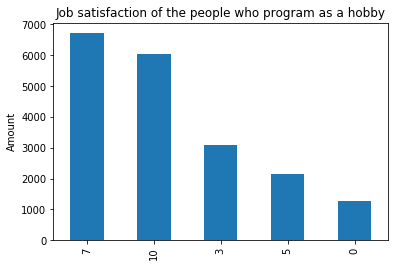

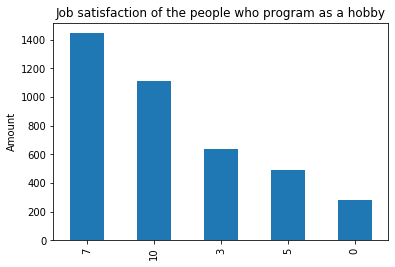

In [25]:
hobbyist_yes.plot(kind="bar")
plt.title('Job satisfaction of the people who program as a hobby')
plt.ylabel("Amount")
plt.show()

hobbyist_no.plot(kind="bar")
plt.title('Job satisfaction of the people who program as a hobby')
plt.ylabel("Amount")
plt.show()

#### Average job satisfaction level differences if respondent programs as a hobby or not

In [26]:
print("Average job satisfaction for people who program as a hobby:",hobbyist_yes_mean)
print("Average job satisfaction for people who do not program as a hobby:",hobbyist_no_mean)

Average job satisfaction for people who program as a hobby: 6.616637278290634
Average job satisfaction for people who do not program as a hobby: 6.455670623894923


#### These graphs show how the job satisfaction is affected by the amount of years that respondent has worked professionally

In [27]:
#People who have worked less than 5 years professionally
less5 =  satisfaction[satisfaction["YearsCodePro"].astype(int) < 5].JobSat.value_counts()
less5_mean =  satisfaction[satisfaction["YearsCodePro"].astype(int) < 5].JobSat.mean()

# People who have 5-10 years professionally
less10 =  satisfaction[(satisfaction["YearsCodePro"].astype(int) < 11) & (satisfaction["YearsCodePro"].astype(int) >= 5)].JobSat.value_counts()
less10_mean =  satisfaction[(satisfaction["YearsCodePro"].astype(int) < 11) & (satisfaction["YearsCodePro"].astype(int) >= 5)].JobSat.mean()

# People who have worked 11 to 20 years professionally
less20 =  satisfaction[(satisfaction["YearsCodePro"].astype(int) < 21) & (satisfaction["YearsCodePro"].astype(int) >= 11)].JobSat.value_counts()
less20_mean =  satisfaction[(satisfaction["YearsCodePro"].astype(int) < 21) & (satisfaction["YearsCodePro"].astype(int) >= 11)].JobSat.mean()

# People who have worked 21-30 years professionally
less30 =  satisfaction[(satisfaction["YearsCodePro"].astype(int) < 31) & (satisfaction["YearsCodePro"].astype(int) >= 21)].JobSat.value_counts()
less30_mean =  satisfaction[(satisfaction["YearsCodePro"].astype(int) < 31) & (satisfaction["YearsCodePro"].astype(int) >= 21)].JobSat.mean()

# People who have worked more than 30 years professionally
more30 =  satisfaction[satisfaction["YearsCodePro"].astype(int) > 30].JobSat.value_counts()
more30_mean =  satisfaction[satisfaction["YearsCodePro"].astype(int) > 30].JobSat.mean()


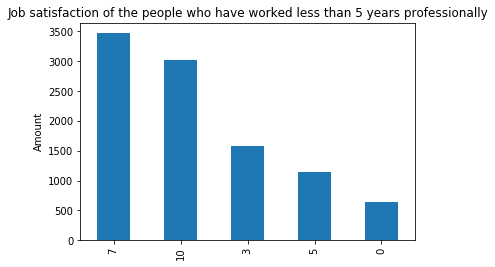

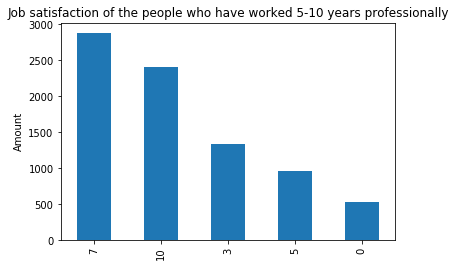

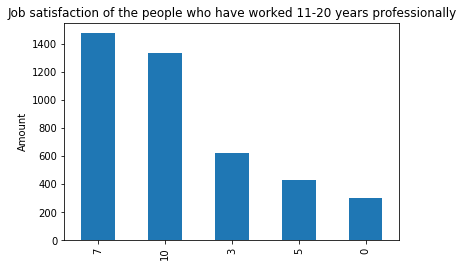

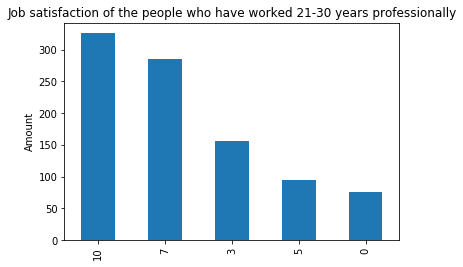

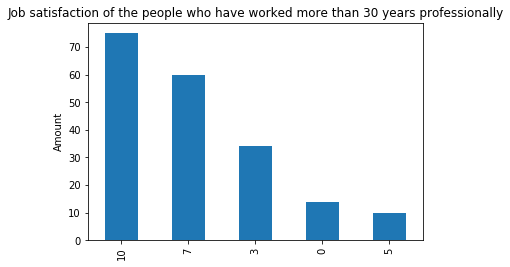

In [28]:
less5.plot(kind="bar")
plt.title('Job satisfaction of the people who have worked less than 5 years professionally')
plt.ylabel("Amount")
plt.show()

less10.plot(kind="bar")
plt.title('Job satisfaction of the people who have worked 5-10 years professionally')
plt.ylabel("Amount")
plt.show()

less20.plot(kind="bar")
plt.title('Job satisfaction of the people who have worked 11-20 years professionally')
plt.ylabel("Amount")
plt.show()

less30.plot(kind="bar")
plt.title('Job satisfaction of the people who have worked 21-30 years professionally')
plt.ylabel("Amount")
plt.show()


more30.plot(kind="bar")
plt.title('Job satisfaction of the people who have worked more than 30 years professionally')
plt.ylabel("Amount")
plt.show()

#### Finding how average job satisfaction changes when respondent has worked as a professional coder longer

In [29]:
print("Average job satisfaction for people who have worked less than 5 years professionally:",less5_mean)
print("Average job satisfaction for people who have worked more than 5 years  and less than 10 professionally:",less10_mean)
print("Average job satisfaction for people who have worked more than 10 years and less than 20 years professionally:",less20_mean)
print("Average job satisfaction for people who have worked more than 20 years and less than 30 years professionally:",less30_mean)
print("Average job satisfaction for people who have worked more than 30 years professionally:",more30_mean)

Average job satisfaction for people who have worked less than 5 years professionally: 6.59541209906618
Average job satisfaction for people who have worked more than 5 years  and less than 10 professionally: 6.5410240592227025
Average job satisfaction for people who have worked more than 10 years and less than 20 years professionally: 6.652299542499398
Average job satisfaction for people who have worked more than 20 years and less than 30 years professionally: 6.607675906183369
Average job satisfaction for people who have worked more than 30 years professionally: 6.849740932642487


#### Average job satisfaction when programmer has worked with certain programming languages in the past year

In [30]:
#Creating arrays to store answers
results = []
database_results = []

#For loop to find average job satisfaction when programmer has worked with certaing languages in the past year
for item in languages:
    result = features[features[item] == 1].JobSat.mean()
    results.append(result)
    
#For loop to find average job satisfaction when programmer has worked with certaing databases in the past year
for item in databases:
    result = features[features[item] == 1].JobSat.mean()
    database_results.append(result)

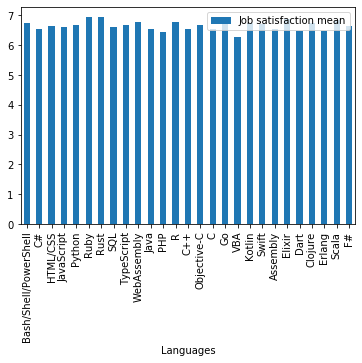

In [31]:
#Creating new dataframe which consist of the language and its average job satisfaction
lang_df = pd.DataFrame(list(zip(languages,results)),columns=["Languages","Job satisfaction mean"])

ax = lang_df.plot.bar(x="Languages",y="Job satisfaction mean")

#### Average job satisfaction when programmer has worked with certain databases in the past year

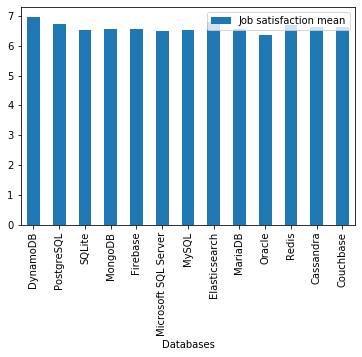

In [32]:
#Creating new dataframe which consist of the database and its average job satisfaction
database_df = pd.DataFrame(list(zip(databases,database_results)),columns=["Databases","Job satisfaction mean"])

ax = database_df.plot.bar(x="Databases",y="Job satisfaction mean")


#### Average job satisfaction for different education levels

In [33]:
#Creating array where I will hold the answers
results = []

#For loop to find job satisfaction for different education levels
for item in edlevels:
    result = features[features[item] == 1].JobSat.mean()
    results.append(result)

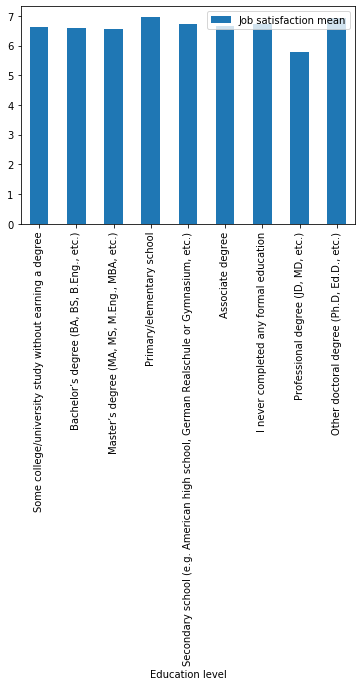

In [34]:
#Creating new dataframe which consist of the education level and its average job satisfaction
education_df = pd.DataFrame(list(zip(edlevels,results)),columns=["Education level","Job satisfaction mean"])

ax = education_df.plot.bar(x="Education level",y="Job satisfaction mean")

#### Average job satisfaction for different job types

In [35]:
results = []

#For loop to find job satisfaction for different developer types
for item in dev:
    result = features[features[item] == 1].JobSat.mean()
    results.append(result)

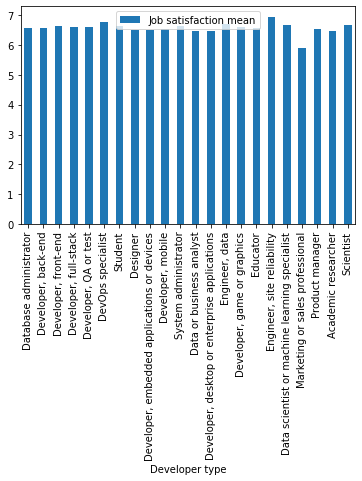

In [36]:
dev_df = pd.DataFrame(list(zip(dev,results)),columns=["Developer type","Job satisfaction mean"])

ax = dev_df.plot.bar(x="Developer type")

<br>

## Step 5 - Dividing the dataset into train and test datasets

In [37]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(final_data, final_data["JobSat"], random_state=4, train_size=0.5)

<br>

## Step 6 - Using different models and classifiers with train data

To select the models and classifiers to be used I will use the mindmap shown below. I will also use some classifiers which are not recommended in this mindmap but we have learn during to course just to see how those work.

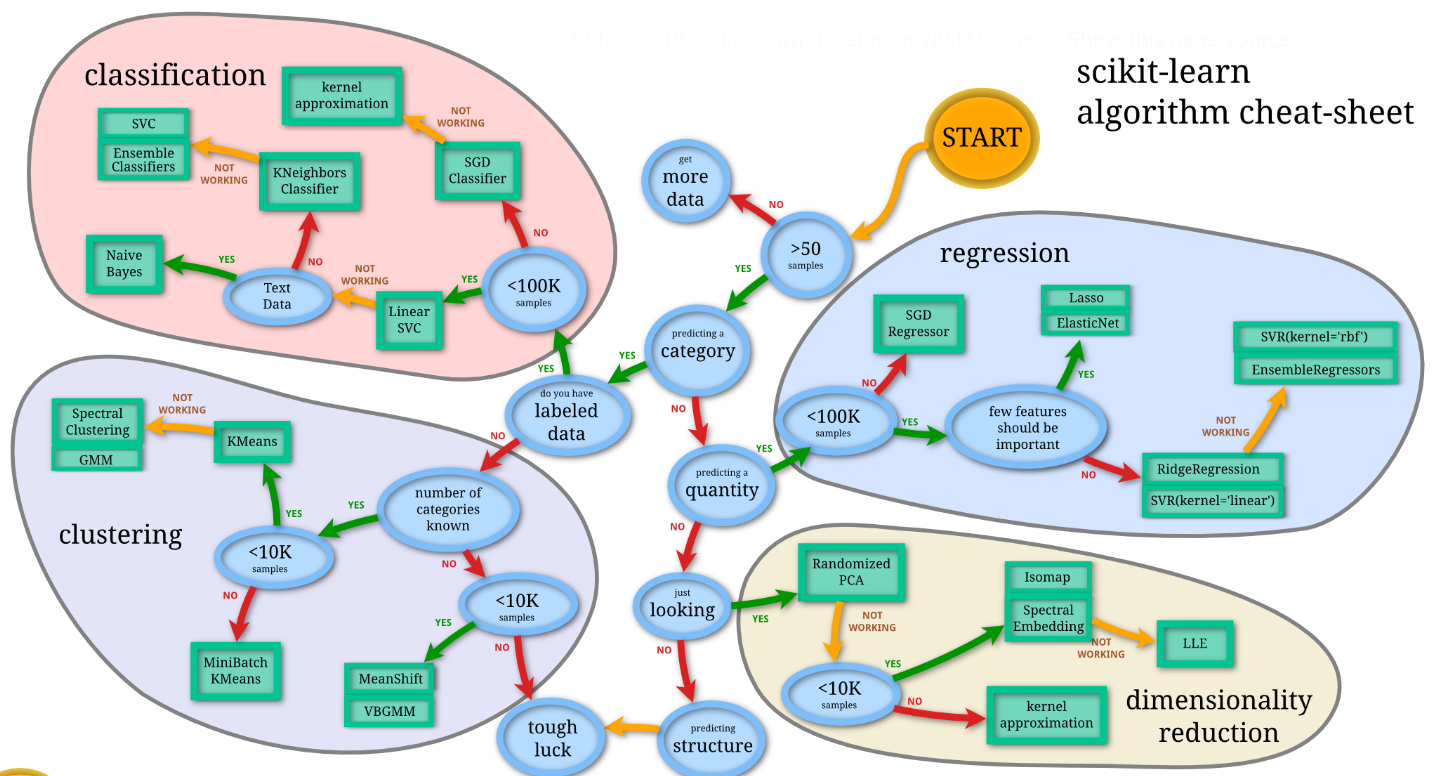

In [38]:
from IPython.display import Image
Image(filename='help.png') 

### Using KNeighborsClassifier

I am going to find the accuracies with up to 100 closest neighbours

In [39]:
from sklearn.neighbors import KNeighborsClassifier

In [40]:
from sklearn.metrics import accuracy_score

results_df = pd.DataFrame(columns=['model', 'accuracy'])

for i in range(3, 100, 2):
    model = KNeighborsClassifier(n_neighbors = i)
    model.fit(X_train,y_train)
    acc = accuracy_score(y_test, model.predict(X_test))
    results_df = results_df.append({'model': str(i)+"-NN", 'accuracy': acc }, ignore_index=True)

print(results_df)

    model  accuracy
0    3-NN  0.237157
1    5-NN  0.283969
2    7-NN  0.292660
3    9-NN  0.309526
4   11-NN  0.319250
5   13-NN  0.326306
6   15-NN  0.326994
7   17-NN  0.331641
8   19-NN  0.329834
9   21-NN  0.333792
10  23-NN  0.338955
11  25-NN  0.344377
12  27-NN  0.346270
13  29-NN  0.343516
14  31-NN  0.343086
15  33-NN  0.343344
16  35-NN  0.340762
17  37-NN  0.344721
18  39-NN  0.346184
19  41-NN  0.347130
20  43-NN  0.346442
21  45-NN  0.351175
22  47-NN  0.350228
23  49-NN  0.353584
24  51-NN  0.354272
25  53-NN  0.355047
26  55-NN  0.352551
27  57-NN  0.352121
28  59-NN  0.351605
29  61-NN  0.353928
30  63-NN  0.352637
31  65-NN  0.353928
32  67-NN  0.353928
33  69-NN  0.354961
34  71-NN  0.354789
35  73-NN  0.356768
36  75-NN  0.357542
37  77-NN  0.357887
38  79-NN  0.358489
39  81-NN  0.356682
40  83-NN  0.356854
41  85-NN  0.357801
42  87-NN  0.360296
43  89-NN  0.360038
44  91-NN  0.363136
45  93-NN  0.360812
46  95-NN  0.361845
47  97-NN  0.361845
48  99-NN  0.362533


### Using Lasso/Ridge regression

In [41]:
from sklearn.linear_model import Ridge, Lasso, LinearRegression, LogisticRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

In [42]:
results_df = pd.DataFrame(columns=['model', 'accuracy'])

model = Lasso(alpha=0.1)
model_lasso = model.fit(X_train,y_train).predict(X_test)
acc = r2_score(y_test, model_lasso)
results_df = results_df.append({'model': "Lasso", 'accuracy': acc }, ignore_index=True)

print(results_df)

   model  accuracy
0  Lasso  0.999873


In [43]:
results_df = pd.DataFrame(columns=['model', 'accuracy'])

model = Ridge()
model_ridge = model.fit(X_train,y_train).predict(X_test)
acc = r2_score(y_test, model_ridge)
results_df = results_df.append({'model': "Ridge", 'r2 score': acc }, ignore_index=True)
print(results_df)

C:\Users\Janar\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.15507e-33): result may not be accurate.
  overwrite_a=True).T


   model accuracy  r2 score
0  Ridge      NaN       1.0


### Using LinearRegression, LogisticRegression, DecisionTreeRegressor and KNeighborsRegressor

In [44]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

In [45]:
results_df = pd.DataFrame(columns=['model', 'r2_score'])

model = LinearRegression()
model_linear = model.fit(X_train,y_train).predict(X_test)
acc = r2_score(y_test, model_linear)
results_df = results_df.append({'model': "LinearRegressor", 'r2_score': acc }, ignore_index=True)

model1 = LogisticRegression()
model_logistic = model1.fit(X_train,y_train).predict(X_test)
acc = r2_score(y_test, model_logistic)
results_df = results_df.append({'model': "LogisticRegression", 'r2_score': acc }, ignore_index=True)

model2 = DecisionTreeRegressor()
model_decisiontree = model2.fit(X_train,y_train).predict(X_test)
acc = r2_score(y_test, model_decisiontree)
results_df = results_df.append({'model': "DecisionTreeRegressor", 'r2_score': acc }, ignore_index=True)

model3 = KNeighborsRegressor()
model_kneighbors = model3.fit(X_train,y_train).predict(X_test)
acc = r2_score(y_test, model_kneighbors)
results_df = results_df.append({'model': "KNeighborsRegressor", 'r2_score': acc }, ignore_index=True)

print(results_df)


C:\Users\Janar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Janar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


                   model  r2_score
0        LinearRegressor  0.987032
1     LogisticRegression -1.299846
2  DecisionTreeRegressor  1.000000
3    KNeighborsRegressor -0.182182


### Using BayesianRidge

In [46]:
from sklearn import linear_model

In [47]:
results_df = pd.DataFrame(columns=['model', 'r2_score'])

clf = linear_model.BayesianRidge()
bayesian = clf.fit(X_train,y_train).predict(X_test)
acc = r2_score(y_test, bayesian)
results_df = results_df.append({'model': "BayesianRidge", 'r2_score': acc }, ignore_index=True)
print(results_df)

           model  r2_score
0  BayesianRidge  0.839029


### Using SVR

In [48]:
from sklearn.svm import SVR

In [ ]:
results_df = pd.DataFrame(columns=['model', 'r2_score'])

clf = SVR(C=1.0, epsilon=0.2)
svr = clf.fit(X_train,y_train).predict(X_test)
acc = r2_score(y_test, svr)
results_df = results_df.append({'model': "BayesianRidge", 'r2_score': acc }, ignore_index=True)
print(results_df)

C:\Users\Janar\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


## Step 7 - Conclusion

As we found out 35% of respondents are very satisfied with their work and 30% are slightly satisfied which means that the majority are satisfied with their work. Average satisfaction for all respondents was 6.589.

The main feature which showed some difference was the amount of years respondent had coded professionally – majority of people who had coded for 21 years or more were very satisfied with their work but majority of the people who had worked less very slightly satisfied with the work.

In conclusion it is hard to recommend something to learn because after analyzing different features (for example education, languages worked with etc) they all gave quite similar results ranging from 6.2 to 6.9. The average job satisfaction for different developer types ranged from 5.9 to 6.9 so most of the people who will start working as a developer will probably be slightly satisfied/not satisfied nor dissatisfied with their job in the future. I tried to find correlations between different elements but the way I was trying to implement it took too long or did not work at all (for example only selected one feature) and I was not able to debug it so I was not able to show correlations between different features.

Creating machine learning models was a real struggle for me and I think that I did not manage to test them correctly because the accuracies seemed to be too good. If somebody would want to continue this project I would strongly recommend them to focus on machine learning part first because there is still a lot to improve.